In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
train=pd.read_csv("train_MS.csv",encoding='latin1')
test=pd.read_csv("test_MS.csv",encoding='latin1')

In [43]:
data=train
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
data.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [4]:
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
data.shape

(8523, 12)

In [10]:
#filling missing values using KNN
from sklearn.impute import KNNImputer

In [11]:
imputer = KNNImputer(n_neighbors=2)

In [45]:
f=pd.DataFrame(data['Item_Weight'])
print(f.isnull().sum())

Item_Weight    1463
dtype: int64


In [46]:
data_filled= imputer.fit_transform(f)
f1=pd.DataFrame(data_filled)

In [47]:
print(f1.isnull().sum())
f1.head()

0    0
dtype: int64


,0
0,9.30
1,5.92
2,17.50
3,19.20
4,8.93


In [48]:
data=data.drop(['Item_Weight'], axis=1)
data.insert(loc=1, column='Item_Weight', value=f1[0])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [49]:
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [50]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [58]:
dataf=pd.DataFrame(data['Outlet_Size'])

In [61]:
print(dataf.isnull().sum())

Outlet_Size    2410
dtype: int64


In [62]:
#One approach to imputing categorical features is to replace missing values with the most common class.
#You can do with by taking the index of the most common feature given in Pandas’ value_counts function.
df_most = dataf.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [63]:
df_most.head()

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,Medium
4,High


In [64]:
print(df_most.isnull().sum())

Outlet_Size    0
dtype: int64


In [65]:
df_most.count()

Outlet_Size    8523
dtype: int64

In [66]:
data=data.drop(['Outlet_Size'], axis=1)
data.insert(loc=8, column='Outlet_Size', value=df_most['Outlet_Size'])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
print(data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
data.to_csv("MarketSales-Filled.csv")

In [73]:
#EDA
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


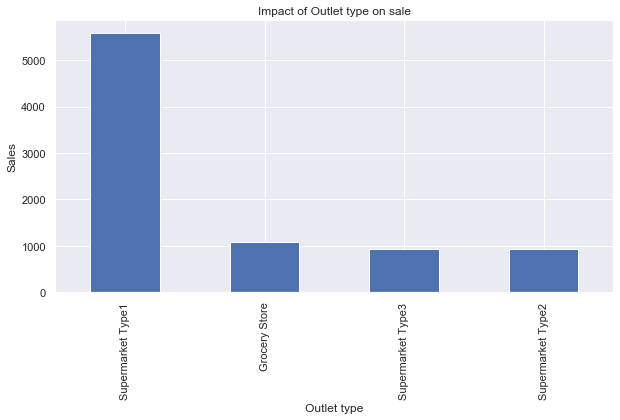

In [77]:
data.Outlet_Type.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Impact of Outlet type on sale")
plt.ylabel('Sales')
plt.xlabel('Outlet type');

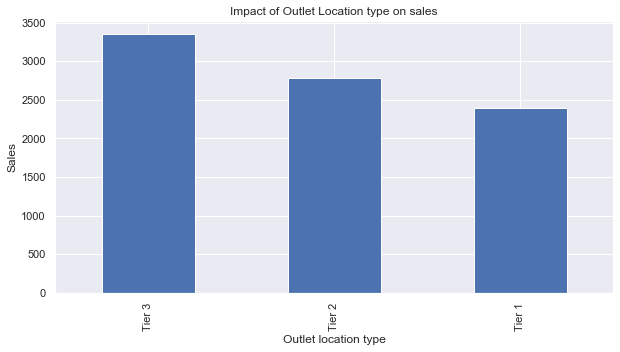

In [78]:
data.Outlet_Location_Type.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Impact of Outlet Location type on sales")
plt.ylabel('Sales')
plt.xlabel('Outlet location type');

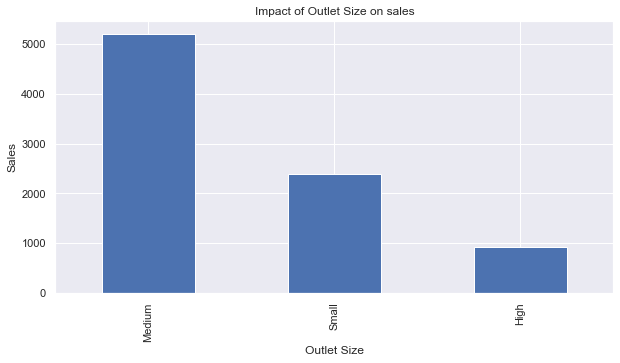

In [79]:
data.Outlet_Size.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Impact of Outlet Size on sales")
plt.ylabel('Sales')
plt.xlabel('Outlet Size');

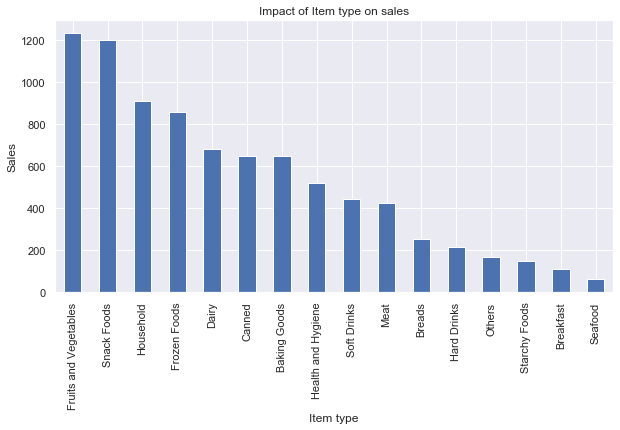

In [80]:
data.Item_Type.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Impact of Item type on sales")
plt.ylabel('Sales')
plt.xlabel('Item type');

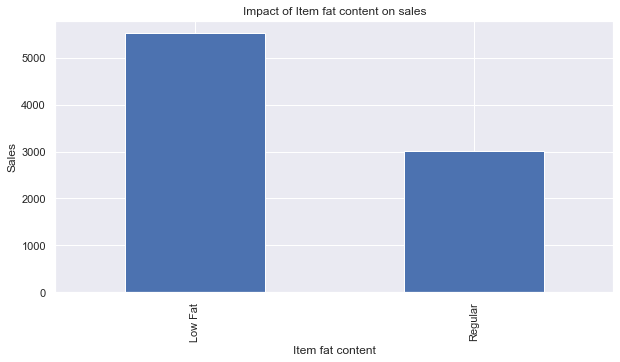

In [100]:
data["Item_Fat_Content"].replace({"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"}, inplace=True)
data.Item_Fat_Content.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Impact of Item fat content on sales")
plt.ylabel('Sales')
plt.xlabel('Item fat content');

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


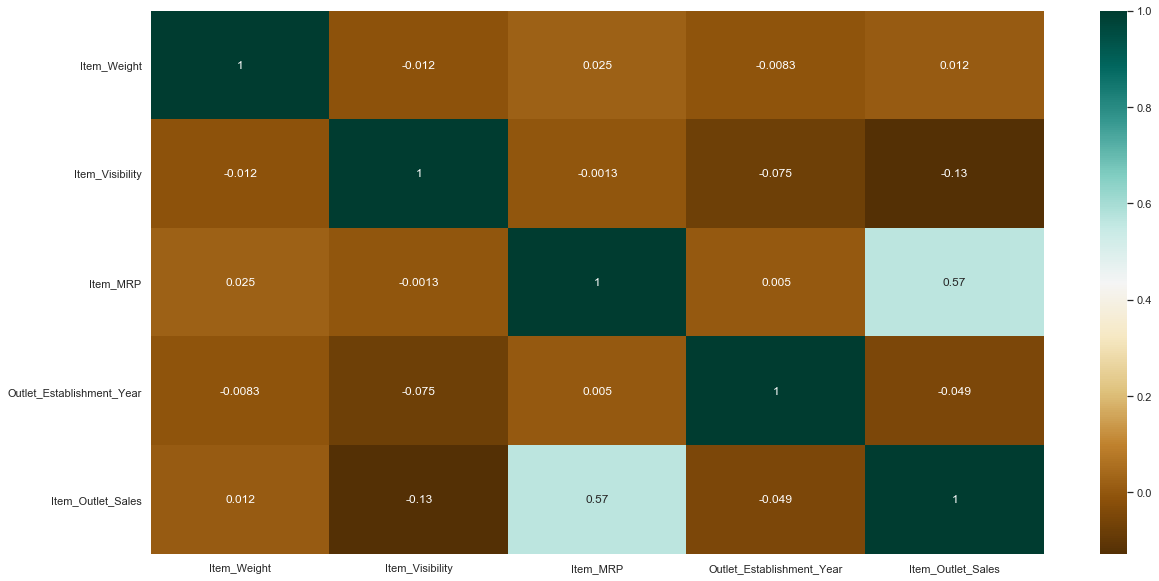

In [84]:
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c
#it is evident that the sales is most dependent on MRP

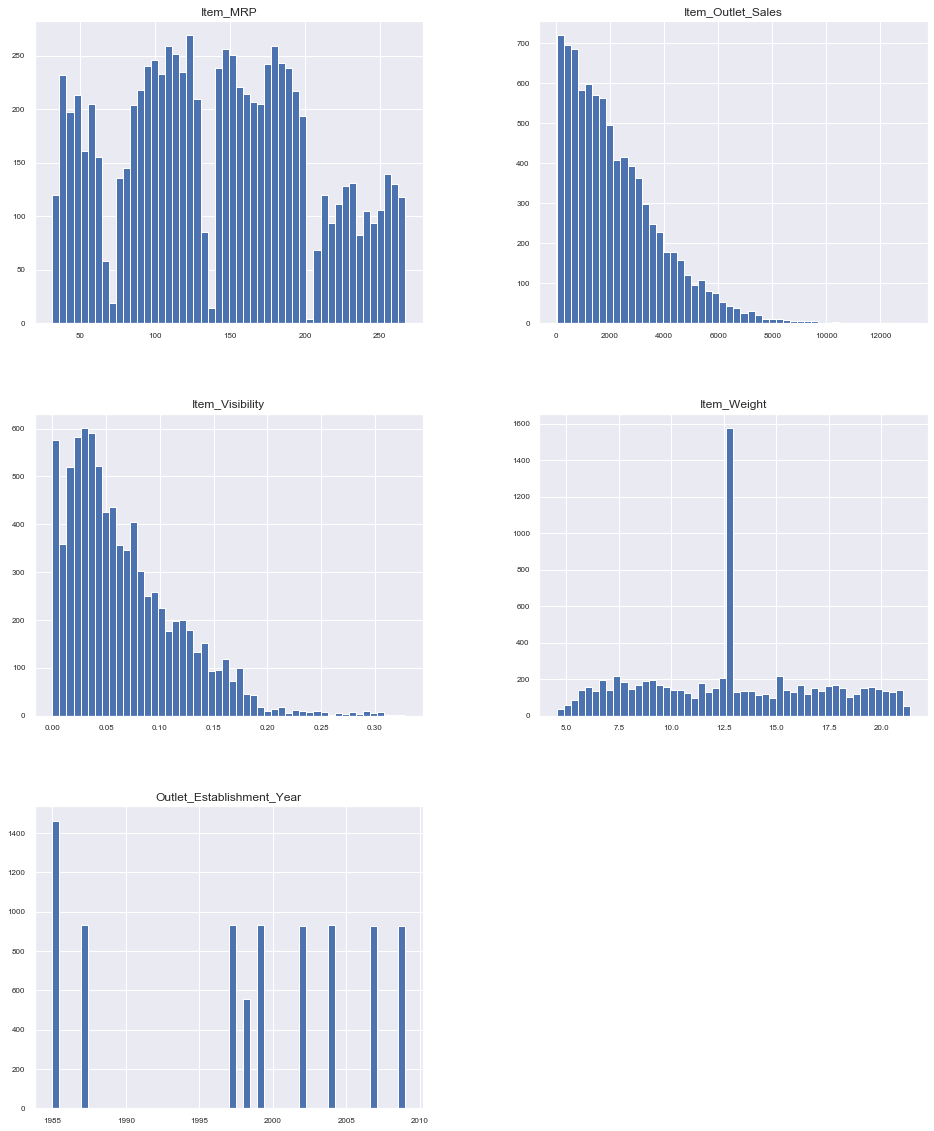

In [85]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [94]:
data[data.columns[0:]].corr()['Item_Outlet_Sales'][:-1]
data_frame1=data
#it is evident that the sales is most dependent on MRP

Item_Weight                  0.011550
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Name: Item_Outlet_Sales, dtype: float64

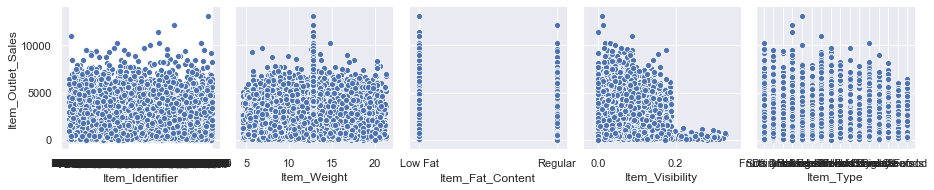

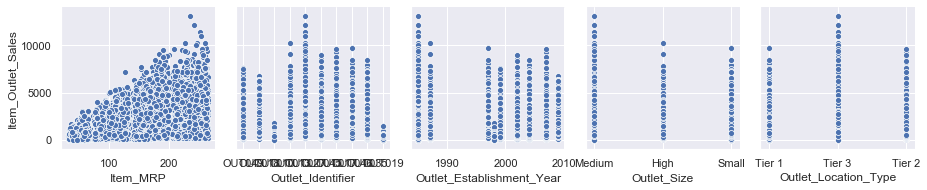

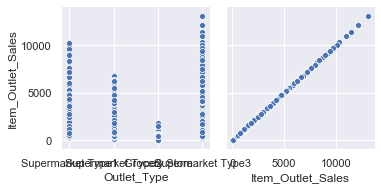

In [102]:
for i in range(0, len(data_frame1.columns), 5):
    sns.pairplot(data=data_frame1,
                x_vars=data_frame1.columns[i:i+5],
                y_vars=['Item_Outlet_Sales'])

In [139]:
#generating hypothesis and different ways to solve problem

#Sales mostly depends on Item_MRP
#Low fat content items has more sales than Regular Fat content items
#Medium Outlet Size has more sales followed by Small Outlet Size
#High Outlet SIze has comparitively less sales, when compared to remaining Outlet Size
#Outlet Location type-Tier 3 has more sales followed by Tier-2. Less sales is observed in Tier-1
#Supermarket type 1 has relatively high sales 
#Grocery type, supermarket type 2 and 3 has relatively same sales.

In [101]:
#hpothesis testing - done out of interest

data.Item_Outlet_Sales.groupby(data.Item_Fat_Content).mean()
#mean of sales with different fat content
#Null hypothesis- there is no significant difference in avg sales of lowfat and regular fat content items
#Alternate hypothesis- there is a significant difference in avg sales of lowfat and regular fat content items 

Item_Fat_Content
Low Fat    2157.711534
Regular    2224.561170
Name: Item_Outlet_Sales, dtype: float64

In [105]:
lowfat=data[data.Item_Fat_Content=='Low Fat']
regular=data[data.Item_Fat_Content=='Regular']

In [104]:
from scipy.stats import ttest_ind

In [109]:
ttest_ind(regular.Item_Outlet_Sales,lowfat.Item_Outlet_Sales,equal_var=False)

Ttest_indResult(statistic=1.7212101304652045, pvalue=0.0852633946472846)

In [108]:
# since p value is greater than 0.05, we fail to reject Null hyp, we reject Alternate Hypothesis.
# Hence, there is no significant difference in avg sales of lowfat and regular fat content items

In [111]:
#Null hypothesis- there is no significant difference in avg sales of High Outlet Size and Medium Outlet Size items
#Alternate hypothesis- there is a significant difference in avg sales of High Outlet Size and Medium Outlet Size items 
data.Item_Outlet_Sales.groupby(data.Outlet_Size).mean()

Outlet_Size
High      2298.995256
Medium    2283.730470
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [113]:
high=data[data.Outlet_Size=='High']
medium=data[data.Outlet_Size=='Medium']
small=data[data.Outlet_Size=='Small']

In [117]:
ttest_ind(high.Item_Outlet_Sales,medium.Item_Outlet_Sales,equal_var=False)

Ttest_indResult(statistic=0.27286320755949683, pvalue=0.7849981141599036)

In [ ]:
# since p value is greater than 0.05, we fail to reject Null hyp, we reject Alternate Hypothesis.
# Hence, there is no significant difference in avg sales of High Outlet Size and Medium Outlet Size items

In [121]:
ttest_ind(high.Item_Outlet_Sales,small.Item_Outlet_Sales,equal_var=False)
# p value is neg and less than 0.05,Hence, there is a significant difference in avg sales of High Outlet Size and Small Outlet Size items

Ttest_indResult(statistic=6.472803446959539, pvalue=1.2462491961745826e-10)

In [119]:
ttest_ind(medium.Item_Outlet_Sales,small.Item_Outlet_Sales,equal_var=False)
# p value is neg and less than 0.05,Hence, there is a significant difference in avg sales of medium Outlet Size and Small Outlet Size items

Ttest_indResult(statistic=9.134291446610186, pvalue=9.268229397557429e-20)

In [122]:
#Outlet_Location_Type
data.Item_Outlet_Sales.groupby(data.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [123]:
tier1=data[data.Outlet_Location_Type=='Tier 1']
tier2=data[data.Outlet_Location_Type=='Tier 2']
tier3=data[data.Outlet_Location_Type=='Tier 3']

In [133]:
ttest_ind(tier2.Item_Outlet_Sales,tier1.Item_Outlet_Sales,equal_var=False)
# p value is neg and less than 0.05,Hence, there is a significant difference in avg sales of Tier1 and Tier2 items

Ttest_indResult(statistic=10.390410924744847, pvalue=4.917636913721042e-25)

In [125]:
ttest_ind(tier2.Item_Outlet_Sales,tier3.Item_Outlet_Sales,equal_var=False)
# p value is greater than 0.05,Hence, there is no significant difference in avg sales of Tier2 and Tier3 items

Ttest_indResult(statistic=1.0119231568083777, pvalue=0.3116147939450486)

In [134]:
ttest_ind(tier3.Item_Outlet_Sales,tier1.Item_Outlet_Sales,equal_var=False)
# p value is neg and less than 0.05,Hence, there is a significant difference in avg sales of Tier3 and Tier1 items

Ttest_indResult(statistic=8.760892909592577, pvalue=2.5271513031877153e-18)

In [135]:
data.Item_Outlet_Sales.groupby(data.Outlet_Type).mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [137]:
data.sort_values(by=['Item_Outlet_Sales'], inplace=True, ascending=False)

In [138]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,12.857645,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,12.857645,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,12.857645,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,12.857645,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,12.857645,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
4888,FDF39,14.850000,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
1009,FDU14,12.857645,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.6750
7191,NCH18,12.857645,Low Fat,0.044445,Household,245.2802,OUT027,1985,Medium,Tier 3,Supermarket Type3,10072.8882
4289,NCM05,6.825000,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362
7752,FDC17,12.857645,Low Fat,0.015386,Frozen Foods,208.9928,OUT027,1985,Medium,Tier 3,Supermarket Type3,9678.0688
